In [1]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 

pd.set_option('display.max_columns', 158)
pd.set_option('display.max_rows', 158)

In [2]:
previous_application_df = pd.read_csv('previous_application.csv')
application_data_df = pd.read_csv('application_data.csv')

In [3]:
merged = application_data_df.merge(previous_application_df, on='SK_ID_CURR', how='left')

In [4]:
merged.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House 

In [5]:
col = []
col = merged.columns

In [6]:
merged.info

<bound method DataFrame.info of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_

In [7]:
merged.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430062e+06,1.428936e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,482581.000000,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430153e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,623757.000000,1.428254e+06,1.184536e+06,711456.000000,597759.000000,739099.000000,483279.000000,434653.000000,673878.000000,716767.000000,725136.000000,463595.000000,584695.000000,455811.000000,719154.000000,440320.000000,647178.000000,711456.000000,597759.000000,739099.000000,483279.000000,434653.000000,673878.000000,716767.000000,725136.000000,463595.000000,584695.000000,455811.000000,719154.000000,440320.000000,647178.000000,711456.000000,597759.000000,739099.000000,483279.00000,434653.000000,673878.000000,716767.000000,725136.000000,463595.000000,584695.000000,455811.000000,719154.000000,440320.000000,647178.000000,746347.000000,1.426762e+06,1.426762e+06,1.426762e+06,1.426762e+06,1.430154e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,

In [9]:
merged.isnull().sum().sort_values()

SK_ID_CURR                            0
HOUR_APPR_PROCESS_START_x             0
REG_REGION_NOT_LIVE_REGION            0
REG_REGION_NOT_WORK_REGION            0
LIVE_REGION_NOT_WORK_REGION           0
REG_CITY_NOT_LIVE_CITY                0
REG_CITY_NOT_WORK_CITY                0
LIVE_CITY_NOT_WORK_CITY               0
ORGANIZATION_TYPE                     0
FLAG_DOCUMENT_6                       0
FLAG_DOCUMENT_21                      0
FLAG_DOCUMENT_20                      0
FLAG_DOCUMENT_19                      0
FLAG_DOCUMENT_18                      0
FLAG_DOCUMENT_17                      0
FLAG_DOCUMENT_16                      0
FLAG_DOCUMENT_15                      0
FLAG_DOCUMENT_14                      0
FLAG_DOCUMENT_13                      0
FLAG_DOCUMENT_12                      0
FLAG_DOCUMENT_11                      0
FLAG_DOCUMENT_10                      0
FLAG_DOCUMENT_9                       0
FLAG_DOCUMENT_8                       0
FLAG_DOCUMENT_2                       0


In [10]:
merged.shape

(1430155, 158)

In [10]:
missing_values_count = merged.isnull().sum().sort_values()

In [11]:
totel_cell =np.product(merged.shape)
totel_missing = missing_values_count.sum()

per_missing = (totel_missing/totel_cell)*100 
print(per_missing)

23.026400741107597


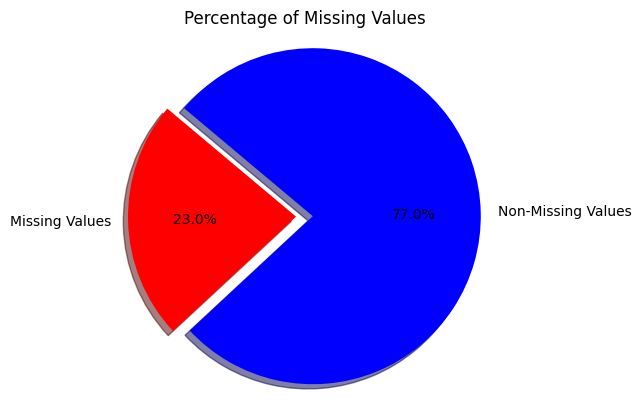

In [14]:
labels = ['Missing Values', 'Non-Missing Values']
sizes = [per_missing, 100 - per_missing]
colors = ['red', 'blue']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 

plt.title('Percentage of Missing Values')

plt.show()

In [15]:
msng_info = pd.DataFrame(merged.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_info.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START_x,0
2,REG_REGION_NOT_LIVE_REGION,0
3,REG_REGION_NOT_WORK_REGION,0
4,LIVE_REGION_NOT_WORK_REGION,0


In [16]:
msng_info['msng_pct'] = msng_info['null_count']/merged.shape[0]*100
msng_info.to_excel(r"missing_info.xlsx",index=False)
msng_info.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START_x,0,0.0
2,REG_REGION_NOT_LIVE_REGION,0,0.0
3,REG_REGION_NOT_WORK_REGION,0,0.0
4,LIVE_REGION_NOT_WORK_REGION,0,0.0


In [17]:
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
msng_col

['DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'EMERGENCYSTATE_MODE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'HOUSETYPE_MODE',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'NAME_TYPE_SUITE_y',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'EXT_SOURCE_1',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOO

In [18]:
new_merged = merged

In [19]:
merged_msng_df = merged.drop(labels=msng_col,axis=1)

In [20]:
print (merged.shape)
print (merged_msng_df.shape)

(1430155, 158)
(1430155, 98)


In [21]:
merged_msng_df['OCCUPATION_TYPE'].isnull().sum()

462731

In [22]:
merged_msng_df['OCCUPATION_TYPE'].fillna('unemployed', inplace=True)

In [23]:
merged_msng_df['OCCUPATION_TYPE'].isnull().sum()

0

In [24]:
flag_Col = []

for col in merged_msng_df.columns:
    if col.startswith("FLAG_"):
        flag_Col.append(col)
        
len(flag_Col)

29

In [25]:
flag_Col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_LAST_APPL_PER_CONTRACT']

In [26]:
flag_tgt_col = merged_msng_df[flag_Col+['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_LAST_APPL_PER_CONTRACT,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,0
2,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,0
3,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,0
4,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,0


<Axes: xlabel='FLAG_DOCUMENT_18', ylabel='count'>

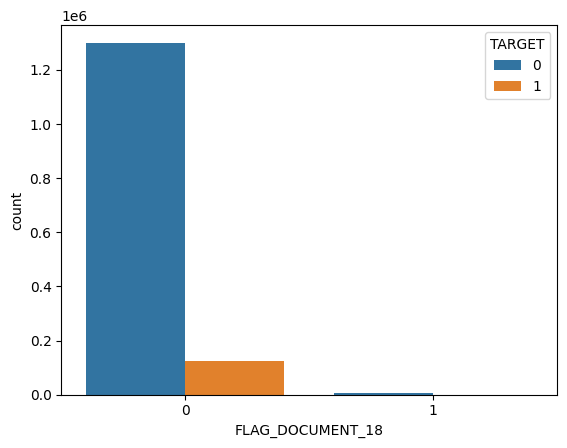

In [27]:
sns.countplot(data=flag_tgt_col,x='FLAG_DOCUMENT_18',hue='TARGET')

ValueError: num must be an integer with 1 <= num <= 28, not 29

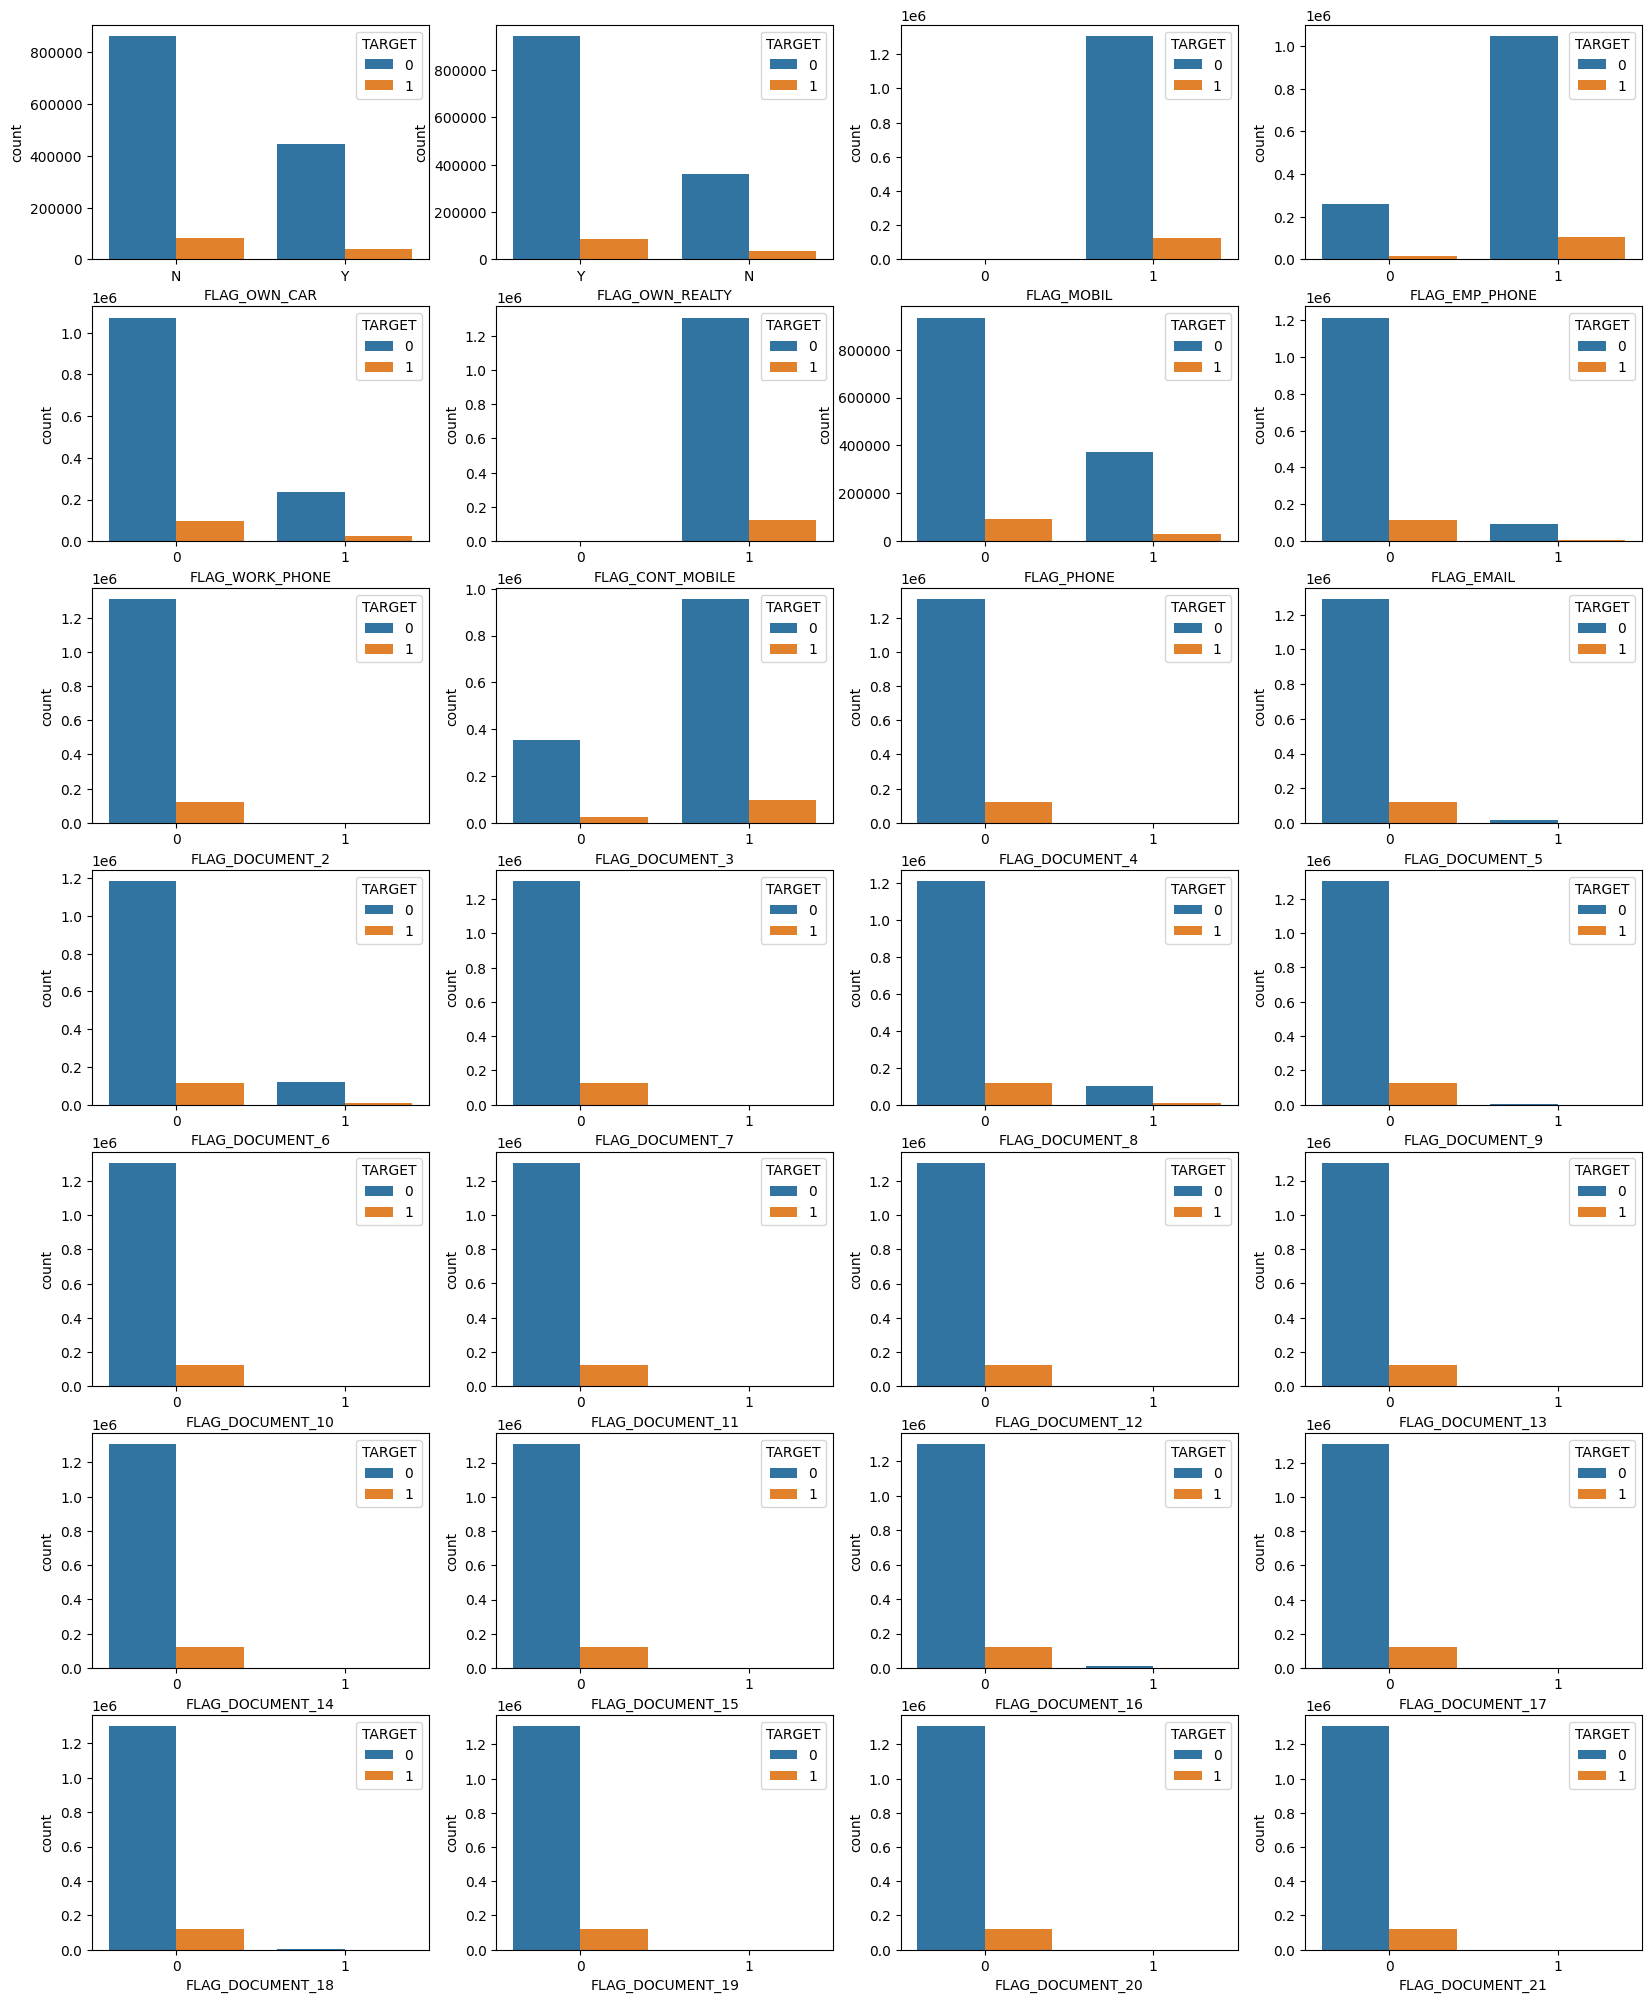

In [28]:

plt.figure(figsize=(20,25))

for i, col in enumerate(flag_Col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')

In [29]:
flag_Doc_Col = []

for col in merged_msng_df.columns:
    if col.startswith("FLAG_DOCUMENT"):
        flag_Doc_Col.append(col)
        
len(flag_Doc_Col)

20

In [30]:
merged_msng_df = merged_msng_df.drop(columns = flag_Doc_Col )

In [31]:
merged_msng_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRC

In [32]:
merged_msng_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regi

In [33]:
days_in_neg =[ 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',"DAYS_ID_PUBLISH","DAYS_DECISION","DAYS_LAST_PHONE_CHANGE"]
merged_msng_df[days_in_neg] =merged_msng_df[days_in_neg].abs()

In [34]:
merged_msng_df[days_in_neg].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_DECISION,DAYS_LAST_PHONE_CHANGE
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.413701e+06,1.430154e+06
mean,1.631495e+04,7.255951e+04,5.001275e+03,3.034492e+03,8.803670e+02,1.076470e+03
std,4.346737e+03,1.432601e+05,3.551626e+03,1.507182e+03,7.835402e+02,8.036988e+02
min,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.272950e+04,1.036000e+03,1.997000e+03,1.783000e+03,2.710000e+02,3.830000e+02
50%,1.603700e+04,2.395000e+03,4.506000e+03,3.330000e+03,5.820000e+02,9.960000e+02
75%,1.997500e+04,6.301000e+03,7.509000e+03,4.319000e+03,1.313000e+03,1.678000e+03
max,2.522900e+04,3.652430e+05,2.467200e+04,7.197000e+03,2.922000e+03,4.292000e+03


In [35]:
merged_msng_df.isnull().sum().sort_values()

SK_ID_CURR                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE                      0
REGION_RATING_CLIENT                 0
FLAG_MOBIL                           0
REGION_RATING_CLIENT_W_CITY          0
HOUR_APPR_PROCESS_START_x            0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
ORGANIZATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START_x         0
DAYS_ID_PUBLISH                      0
LIVE_CITY_NOT_WORK_CITY              0
DAYS_EMPLOYED                        0
TARGET                               0
NAME_CONTRACT_TYPE_x                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY          

In [36]:
new_merged = merged_msng_df 

In [37]:
merged_msng_df['FLAG_OWN_CAR'] = merged_msng_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
merged_msng_df['FLAG_OWN_REALTY'] = merged_msng_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

merged_msng_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
0    947544
1    482611
dtype: int64

In [38]:
m =( round(merged_msng_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2))
m

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.00,0.11,-0.16
EXT_SOURCE_3,0.11,1.00,-0.19
TARGET,-0.16,-0.19,1.00


<Axes: >

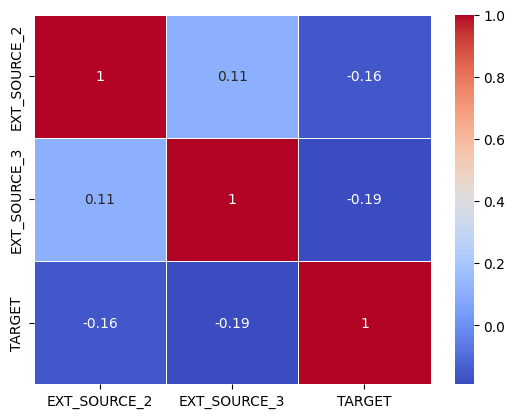

In [39]:
sns.heatmap(data=round(merged_msng_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)


In [40]:
merged_rev_df = merged_msng_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
merged_rev_df.shape

(1430155, 76)

In [41]:
null_count = pd.DataFrame(previous_application_df.isnull().sum().sort_values(ascending=False)/previous_application_df.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [42]:
merged_rev_df['CNT_FAM_MEMBERS'].isnull().sum()

2

In [43]:
merged_rev_df.isnull().sum().sort_values(ascending=False)/merged_rev_df.shape[0]*100

AMT_GOODS_PRICE_y               23.492489
AMT_ANNUITY_y                   22.631952
CNT_PAYMENT                     22.631603
AMT_REQ_CREDIT_BUREAU_HOUR      11.593988
AMT_REQ_CREDIT_BUREAU_DAY       11.593988
AMT_REQ_CREDIT_BUREAU_WEEK      11.593988
AMT_REQ_CREDIT_BUREAU_MON       11.593988
AMT_REQ_CREDIT_BUREAU_QRT       11.593988
AMT_REQ_CREDIT_BUREAU_YEAR      11.593988
PRODUCT_COMBINATION              1.172390
AMT_CREDIT_y                     1.150575
HOUR_APPR_PROCESS_START_y        1.150505
WEEKDAY_APPR_PROCESS_START_y     1.150505
SK_ID_PREV                       1.150505
AMT_APPLICATION                  1.150505
NAME_CONTRACT_TYPE_y             1.150505
NAME_CASH_LOAN_PURPOSE           1.150505
NFLAG_LAST_APPL_IN_DAY           1.150505
FLAG_LAST_APPL_PER_CONTRACT      1.150505
NAME_CONTRACT_STATUS             1.150505
NAME_SELLER_INDUSTRY             1.150505
DAYS_DECISION                    1.150505
NAME_PAYMENT_TYPE                1.150505
CODE_REJECT_REASON               1

In [44]:
merged_rev_df['CNT_FAM_MEMBERS'].isnull().sum()

2

In [45]:
new_merged_rev_df= merged_rev_df

In [46]:
new_merged_rev_df['CNT_FAM_MEMBERS'] = new_merged_rev_df['CNT_FAM_MEMBERS'].fillna((new_merged_rev_df['CNT_FAM_MEMBERS'].mode()[0]))


In [47]:
new_merged_rev_df['CNT_FAM_MEMBERS'].isnull().sum()

0

###### catagorical variable
OCCUPATION_TYPE
                     NAME_TYPE_SUITE

In [48]:
new_merged_rev_df['NAME_TYPE_SUITE_x'] = new_merged_rev_df['NAME_TYPE_SUITE_x'].fillna((new_merged_rev_df['NAME_TYPE_SUITE_x'].mode()[0]))


In [49]:
new_merged_rev_df['NAME_TYPE_SUITE_x'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE_x, dtype: object

In [50]:
new_merged_rev_df['NAME_TYPE_SUITE_x'].head()

0    Unaccompanied
1           Family
2           Family
3           Family
4    Unaccompanied
Name: NAME_TYPE_SUITE_x, dtype: object

In [51]:
new_merged_rev_df['NAME_TYPE_SUITE_x'].isnull().sum()

0

In [52]:
new_merged_rev_df['AMT_ANNUITY_x'].isnull().sum()

93

In [53]:
new_merged_rev_df['AMT_ANNUITY_x'].dtype()

TypeError: 'numpy.dtypes.Float64DType' object is not callable

In [54]:
new_merged_rev_df['AMT_ANNUITY_x'].mean()

27042.029965134378

In [55]:
new_merged_rev_df['AMT_ANNUITY_x'].mode()

0    13500.0
Name: AMT_ANNUITY_x, dtype: float64

In [56]:
new_merged_rev_df['AMT_ANNUITY_x'].head()

0    24700.5
1    35698.5
2    35698.5
3    35698.5
4     6750.0
Name: AMT_ANNUITY_x, dtype: float64

In [57]:
new_merged_rev_df['AMT_ANNUITY_x'] = new_merged_rev_df['AMT_ANNUITY_x'].fillna((new_merged_rev_df['AMT_ANNUITY_x'].mean()))

In [58]:
new_merged_rev_df['AMT_ANNUITY_x'].isnull().sum()

0

In [59]:
amt_req_col = []

for col in new_merged_rev_df.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [60]:
new_merged_rev_df['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()


array([ 0., nan,  1.,  2.,  3.,  4.])

In [61]:
new_merged_rev_df['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [62]:
for col in amt_req_col:
    new_merged_rev_df[col] = new_merged_rev_df[col].fillna((new_merged_rev_df[col].median()))

In [63]:
new_merged_rev_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [64]:
new_merged_rev_df['AMT_GOODS_PRICE_x'].isnull().sum()

1219

In [65]:
new_merged_rev_df['AMT_GOODS_PRICE_x'].head()

0     351000.0
1    1129500.0
2    1129500.0
3    1129500.0
4     135000.0
Name: AMT_GOODS_PRICE_x, dtype: float64

In [66]:
new_merged_rev_df['AMT_GOODS_PRICE_x'].median()

450000.0

In [67]:
new_merged_rev_df['AMT_GOODS_PRICE_x'] = new_merged_rev_df['AMT_GOODS_PRICE_x'].fillna((new_merged_rev_df['AMT_GOODS_PRICE_x'].median()))
new_merged_rev_df['AMT_GOODS_PRICE_x'].isnull().sum()


0

In [68]:
new_merged_rev_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest


In [69]:
new_merged_rev_df.nunique().sort_values()


REG_CITY_NOT_WORK_CITY                2
LIVE_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY                2
LIVE_REGION_NOT_WORK_REGION           2
REG_REGION_NOT_WORK_REGION            2
REG_REGION_NOT_LIVE_REGION            2
FLAG_LAST_APPL_PER_CONTRACT           2
FLAG_EMAIL                            2
FLAG_PHONE                            2
FLAG_CONT_MOBILE                      2
FLAG_WORK_PHONE                       2
FLAG_MOBIL                            2
NFLAG_LAST_APPL_IN_DAY                2
FLAG_EMP_PHONE                        2
TARGET                                2
NAME_CONTRACT_TYPE_x                  2
FLAG_OWN_CAR                          2
FLAG_OWN_REALTY                       2
REGION_RATING_CLIENT                  3
CODE_GENDER                           3
NAME_PRODUCT_TYPE                     3
REGION_RATING_CLIENT_W_CITY           3
NAME_CLIENT_TYPE                      4
NAME_PAYMENT_TYPE                     4
NAME_CONTRACT_STATUS                  4


In [70]:
new_merged_rev_df['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

In [71]:
# ### Outlier detection & treatment

In [72]:
new_merged_rev_df['AMT_GOODS_PRICE_x'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE_x, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE_x', ylabel='Density'>

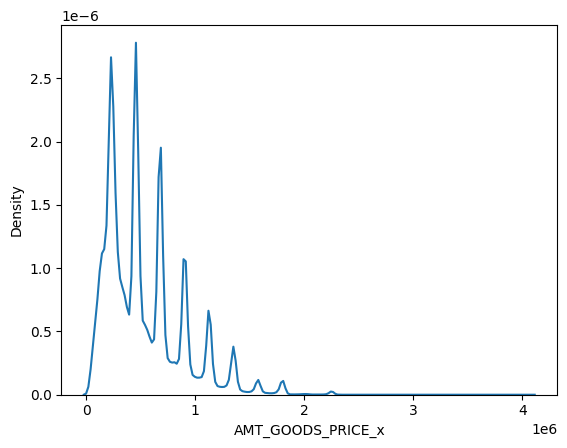

In [73]:
sns.kdeplot(data=new_merged_rev_df,x='AMT_GOODS_PRICE_x')


<Axes: xlabel='AMT_GOODS_PRICE_x'>

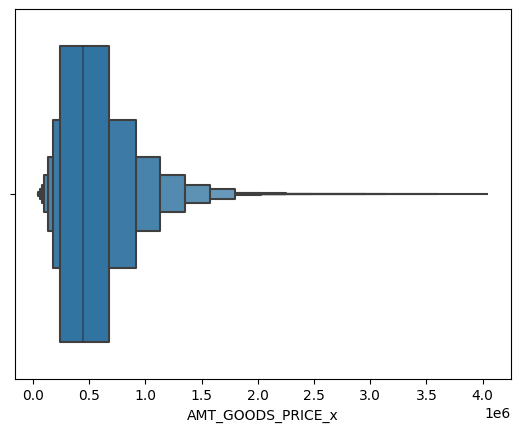

In [74]:
sns.boxenplot(data=new_merged_rev_df,x='AMT_GOODS_PRICE_x')


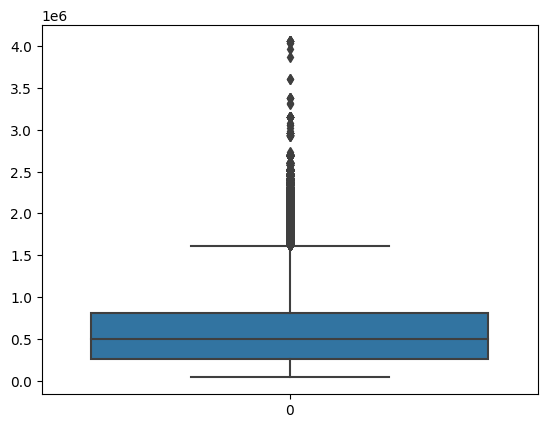

In [132]:
#plt.figure(figsize=(10,2))
sns.boxplot(new_merged_rev_df['AMT_CREDIT_x'])
plt.show()

In [136]:
new_merged_rev_df = new_merged_rev_df[new_merged_rev_df['AMT_CREDIT_x'] < np.nanpercentile(new_merged_rev_df['AMT_CREDIT_x'],90)]


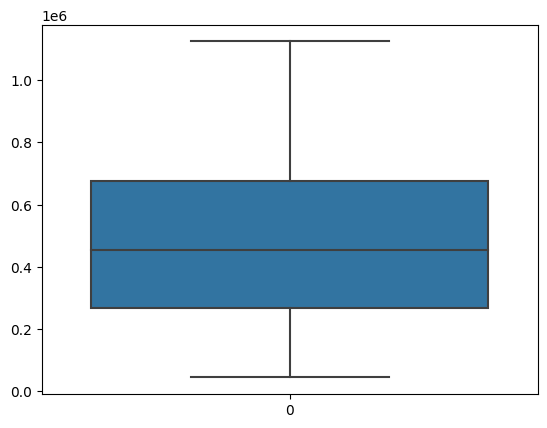

In [139]:
sns.boxplot(new_merged_rev_df['AMT_CREDIT_x'])
plt.show()

In [94]:
new_merged_rev_df['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])


0.10     90000.0
0.20    112500.0
0.30    121500.0
0.40    135000.0
0.50    157500.0
0.60    180000.0
0.70    202500.0
0.80    225000.0
0.90    270000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [95]:
new_merged_rev_df['AMT_INCOME_TOTAL'].max()


117000000.0

In [96]:
new_merged_rev_df['SELLERPLACE_AREA'].agg(['min','max','median'])

min            -1.0
max       4000000.0
median          4.0
Name: SELLERPLACE_AREA, dtype: float64

<Axes: xlabel='SELLERPLACE_AREA'>

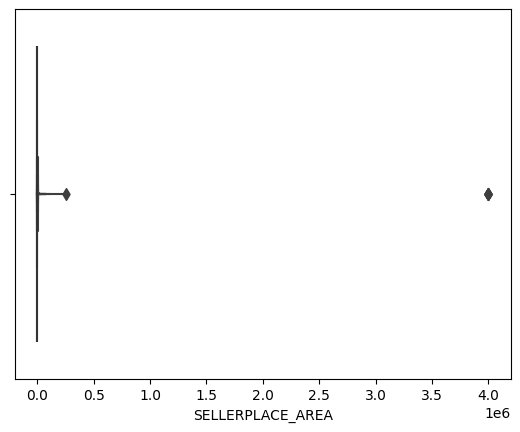

In [97]:
sns.boxenplot(data=new_merged_rev_df,x='SELLERPLACE_AREA')


In [98]:
new_merged_rev_df['SELLERPLACE_AREA'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10      -1.0
0.20      -1.0
0.30      -1.0
0.40      -1.0
0.50       4.0
0.60      29.0
0.70      50.0
0.80     142.0
0.90     939.0
0.99    3570.0
Name: SELLERPLACE_AREA, dtype: float64

In [99]:
#Binning 

In [100]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

new_merged_rev_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(new_merged_rev_df['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [101]:
new_merged_rev_df.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        252946
100K-150K     415076
150K-200K     315224
200K-250K     246753
250K-300K      88613
300K-350K      45560
350K-400K      29236
Above 400K     36747
dtype: int64

In [102]:
new_merged_rev_df['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10    10526.0
0.20    11972.0
0.30    13443.0
0.40    14726.0
0.50    16037.0
0.60    17526.0
0.70    19202.0
0.80    20774.0
0.81    20929.0
0.85    21592.0
0.90    22418.0
0.95    23368.0
0.99    24521.0
Name: DAYS_BIRTH, dtype: float64

In [103]:
new_merged_rev_df['DAYS_BIRTH'].min()


7489

In [104]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

new_merged_rev_df['DAYS_BIRTH_RANGE'] = pd.cut(new_merged_rev_df['DAYS_BIRTH'],bins,labels=ranges)

In [105]:
new_merged_rev_df.groupby(['DAYS_BIRTH_RANGE']).size()


DAYS_BIRTH_RANGE
20Y               0
20Y-30Y      183248
30Y-40Y      375516
40Y-50Y      363069
50Y-60Y      322141
Above 60Y    186181
dtype: int64

In [106]:
new_merged_rev_df['DAYS_BIRTH'].isnull().sum()


0

In [107]:
new_merged_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 78 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1430155 non-null  int64   
 1   TARGET                        1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1430155 non-null  object  
 3   CODE_GENDER                   1430155 non-null  object  
 4   FLAG_OWN_CAR                  1430155 non-null  int64   
 5   FLAG_OWN_REALTY               1430155 non-null  int64   
 6   CNT_CHILDREN                  1430155 non-null  int64   
 7   AMT_INCOME_TOTAL              1430155 non-null  float64 
 8   AMT_CREDIT_x                  1430155 non-null  float64 
 9   AMT_ANNUITY_x                 1430155 non-null  float64 
 10  AMT_GOODS_PRICE_x             1430155 non-null  float64 
 11  NAME_TYPE_SUITE_x             1430155 non-null  object  
 12  NAME_INCOME_TY

In [108]:
new_merged_rev_df.NAME_CONTRACT_TYPE_y.head()


0    Consumer loans
1        Cash loans
2    Consumer loans
3    Consumer loans
4    Consumer loans
Name: NAME_CONTRACT_TYPE_y, dtype: object

In [109]:
new_merged_rev_df['NAME_CONTRACT_TYPE_y'] = new_merged_rev_df['NAME_CONTRACT_TYPE_y'].fillna((new_merged_rev_df['NAME_CONTRACT_TYPE_y'].mode()))
new_merged_rev_df['NAME_CONTRACT_TYPE_y'].isnull().sum()

16454

<Axes: xlabel='DAYS_BIRTH_RANGE', ylabel='count'>

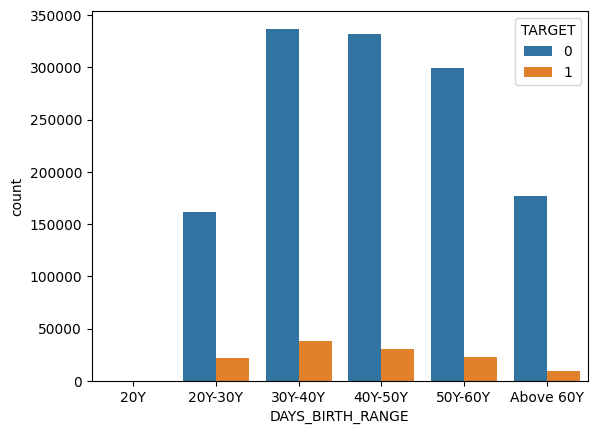

In [110]:
sns.countplot(data=new_merged_rev_df,x='DAYS_BIRTH_RANGE',hue='TARGET')

In [129]:
#sns.barplot(data=new_merged_rev_df,x='DAYS_BIRTH_RANGE',y='PCT',palette='coolwarm')

In [92]:
new_merged_rev_df.groupby(['NAME_CONTRACT_TYPE_x']).size()


NAME_CONTRACT_TYPE_x
Cash loans         1320679
Revolving loans     109476
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE_y', ylabel='count'>

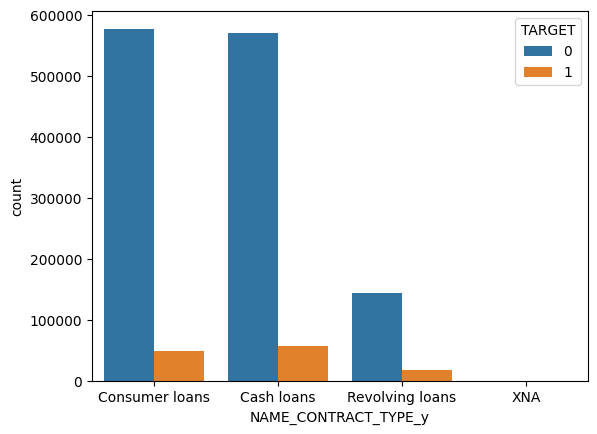

In [93]:
sns.countplot(data=new_merged_rev_df,x='NAME_CONTRACT_TYPE_y',hue='TARGET')

In [93]:
data_pct = new_merged_rev_df[['NAME_CONTRACT_TYPE_x','TARGET']].groupby(['NAME_CONTRACT_TYPE_x'], as_index=False).mean().sort_values(by='TARGET',ascending=False)


In [94]:
data_pct

,NAME_CONTRACT_TYPE_x,TARGET
0,Cash loans,0.088882
1,Revolving loans,0.054405


In [95]:
data_pct['PCT'] = data_pct['TARGET']*100

<Axes: xlabel='NAME_CONTRACT_TYPE_x', ylabel='PCT'>

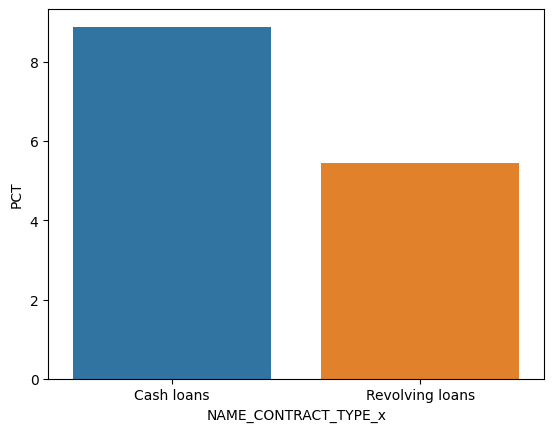

In [96]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE_x',y='PCT')

### NAME_CONTRACT_TYPE
#### most of the customers have taken cash loan
#### customers who have taken cash loans are less likely to default (as per current application)
#### but for the pervioes applications , Revolving loans are less likely to default 

####


In [97]:
obj_var = new_merged_rev_df.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_TYPE_SUITE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x',
       'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:

plt.subplot(25,2,i+i+1)
plt.subplots_adjust(wspace=0.1,hspace=1)
sns.countplot(data=new_merged_rev_df,x=var,hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(25,2,i+i+2)
sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
plt.xticks(rotation=90)

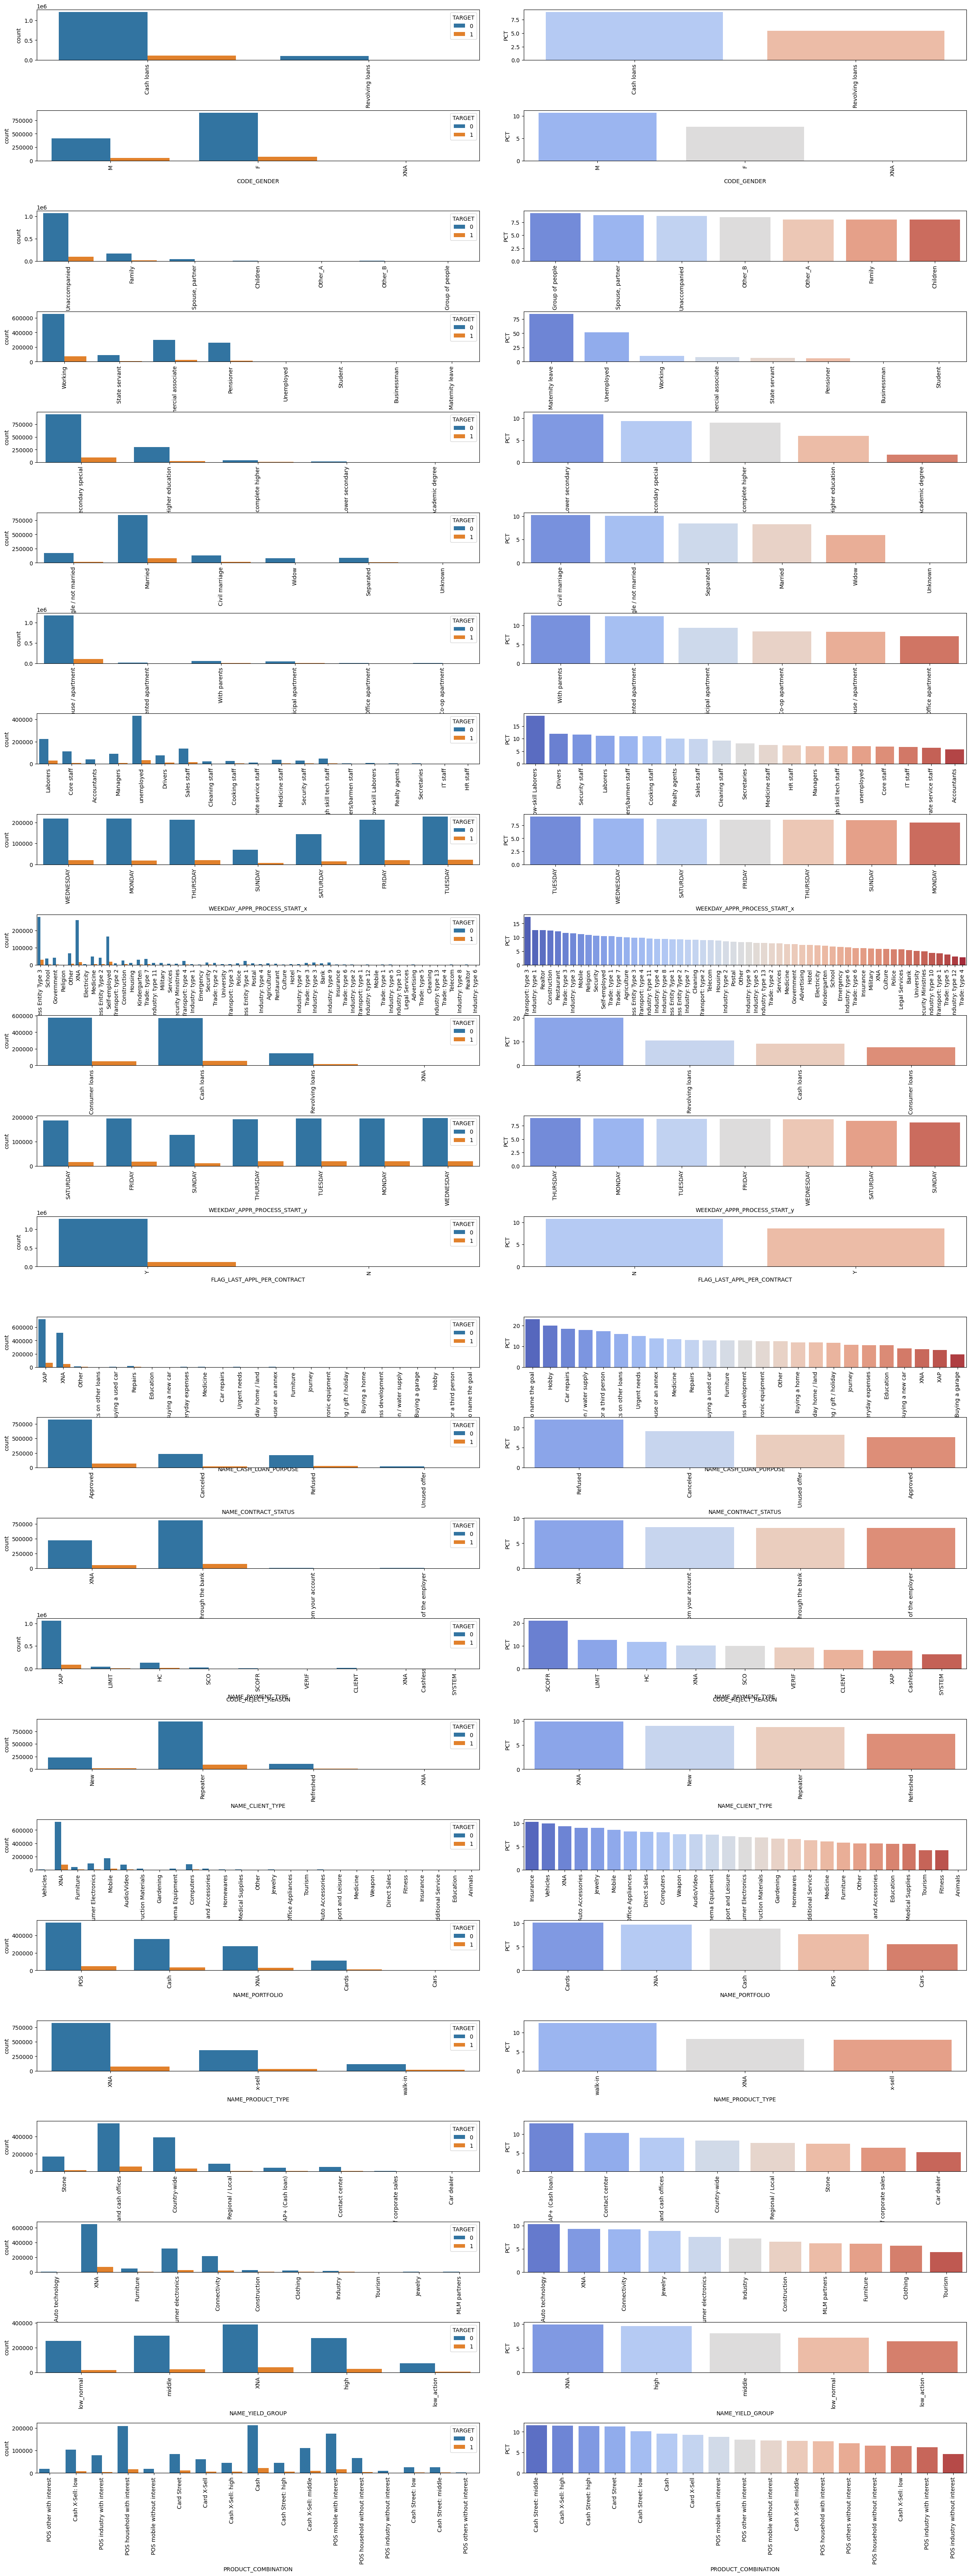

In [98]:
plt.figure(figsize=(30,80))


for i, var in enumerate(obj_var):

    data_pct = new_merged_rev_df[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(25,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=new_merged_rev_df,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(25,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

#### CODE_GENDER - 
######    most of the loans have been taken by female
######    default rate for females are just ~7% which is safer and lesser than male

#### NAME_TYPE_SUITE - 
 
#####    unacompanied people had tanke most of the loans and the default rate is ~8.5% which is still okay
#####     people leving with children are more safer and less defulter

##### NAME_INCOME_TYPE - 
 
#####     the safest segments are working, state servent and pensioners
#


In [101]:
new_merged_rev_df['NAME_EDUCATION_TYPE'].unique()


array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

#### NAME_EDUCATION_TYPE - 
 
#####     Higher education is the safest segment to give the loan with a default rate of less than 5%

##### NAME_FAMILY_STATUS - 
 
######    Married people are safe to target, default rate is 8%
# 

##### NAME_HOUSING_TYPE - 

######     People having house/appartment are safe to give the loan with default rate of ~8%

##### OCCUPATION_TYPE - 
 
#####     Low-Skill Laboreres and drivers are highest defaulters
##### Accountants are less defaulters
#####     Core staff, Managers and Laborers are safer to target with a default rate of <= 7.5 to 10%
#

In [106]:
new_merged_rev_df['NAME_PAYMENT_TYPE'].unique()

array(['XNA', 'Cash through the bank', nan, 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [107]:
new_merged_rev_df['NAME_CLIENT_TYPE'].unique()

array(['New', 'Repeater', 'Refreshed', 'XNA', nan], dtype=object)

#### NAME_PAYMENT_TYPE
##### People having paying from 'Cashless from the account of the employer' are safe to give the loan with default rate of ~8%

#### NAME_CLIENT_TYPE
#####  Refreshed people had tanke most of the loan and default rate is still okay
#

In [110]:
new_merged_rev_df['NAME_CLIENT_TYPE'].isnull().sum()

16454

In [111]:
new_merged_rev_df['NAME_SELLER_INDUSTRY'].unique()

array(['Auto technology', 'XNA', 'Furniture', 'Consumer electronics',
       'Connectivity', 'Construction', 'Clothing', nan, 'Industry',
       'Tourism', 'Jewelry', 'MLM partners'], dtype=object)

#### ORGANIZATION_TYPE - 
 
#####     Transport type 3 highest defaulter
#####     Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 %


#### NAME_SELLER_INDUSTRY
######  there are many clints how are perviously applied with the unkoown (XNA),and more likey do be defaulter 
######  same as with Connectivity industry
#

In [113]:
new_merged_rev_df['CHANNEL_TYPE'].str.count('Car dealer').sum()


406.0

#### CHANNEL_TYPE
######  Clients acquired through credit and cash offices, which might be financial institutions or offices that provide credit services
###### are more likely to apllied for a lone priviously and qulite safe 
#

In [99]:
merged_rev_df['PRODUCT_COMBINATION'].head()

0        POS other with interest
1               Cash X-Sell: low
2     POS industry with interest
3    POS household with interest
4    POS mobile without interest
Name: PRODUCT_COMBINATION, dtype: object

In [100]:
merged_rev_df['CNT_PAYMENT'].head()

0    24.0
1    12.0
2     6.0
3    12.0
4     4.0
Name: CNT_PAYMENT, dtype: float64

In [101]:
merged_rev_df['NAME_CONTRACT_STATUS'].head()

0    Approved
1    Approved
2    Approved
3    Approved
4    Approved
Name: NAME_CONTRACT_STATUS, dtype: object

In [102]:
merged_rev_df['NAME_CASH_LOAN_PURPOSE'].head()

0    XAP
1    XNA
2    XAP
3    XAP
4    XAP
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [103]:
merged_rev_df['NAME_CONTRACT_STATUS'].fillna('panding', inplace=True)
merged_rev_df['NAME_CASH_LOAN_PURPOSE'].fillna('unknown', inplace=True)

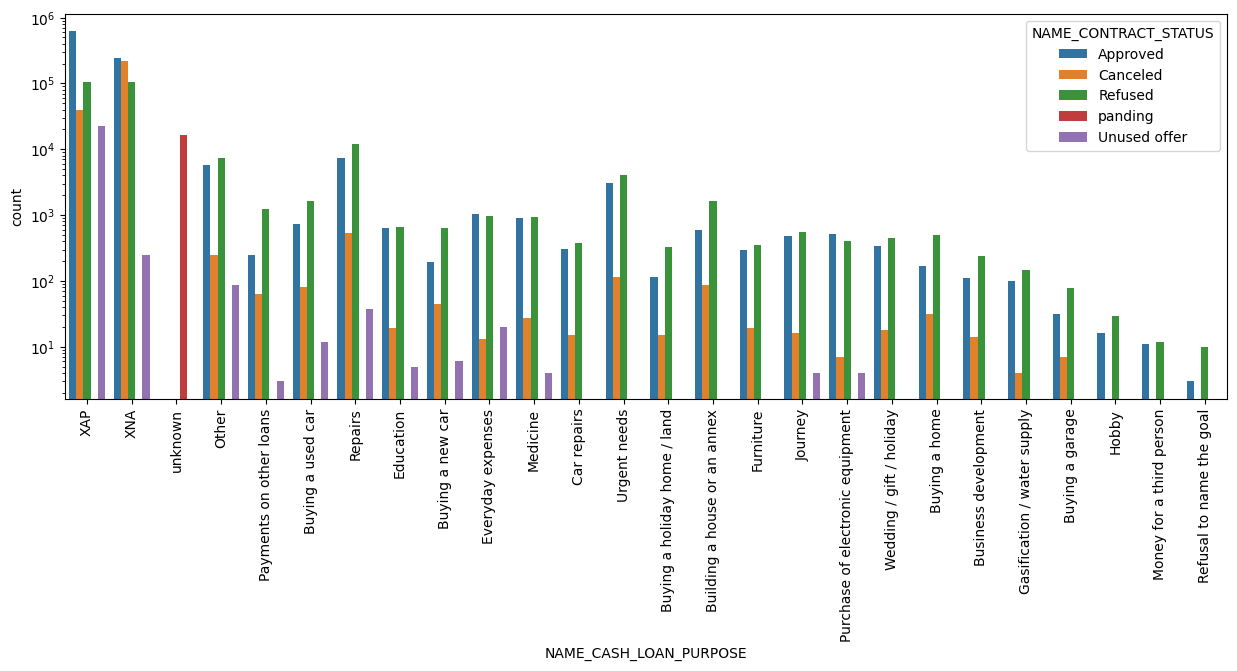

In [104]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_rev_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

####    For the repairing purpose customers had applied mostly prev. and the same puspose has most number of cancelations
#

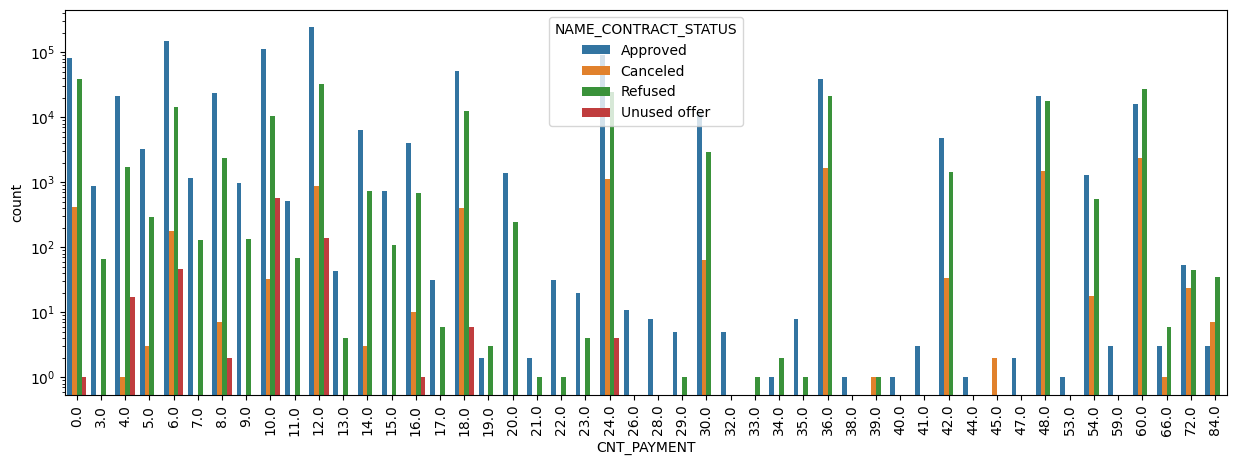

In [113]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_rev_df,x='CNT_PAYMENT',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

In [114]:
new_merged_rev_df.dtypes.value_counts


<bound method IndexOpsMixin.value_counts of SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE_x              object
CODE_GENDER                       object
FLAG_OWN_CAR                       int64
FLAG_OWN_REALTY                    int64
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT_x                     float64
AMT_ANNUITY_x                    float64
AMT_GOODS_PRICE_x                float64
NAME_TYPE_SUITE_x                 object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHO

In [115]:
num_var = new_merged_rev_df.select_dtypes(include=['float64','int64']).columns
num_cat_var = new_merged_rev_df.select_dtypes(include=['float64','int64','category']).columns
num_var

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_B

In [116]:
len(num_var)


51

In [117]:
num_cat_var

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_B

In [118]:
num_data = new_merged_rev_df[num_var]
num_data.groupby(['TARGET']).size()/num_data.shape[0]*100

TARGET
0    91.37576
1     8.62424
dtype: float64

In [119]:
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,98356.995,900000.0,1035882.0,900000.0,12.0,1.0,746.0,-1.0,12.0
2,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,64567.665,337500.0,348637.5,337500.0,17.0,1.0,828.0,1400.0,6.0
3,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,6737.310,68809.5,68053.5,68809.5,15.0,1.0,2341.0,200.0,12.0
4,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,5357.250,24282.0,20106.0,24282.0,5.0,1.0,815.0,30.0,4.0
5,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,3.0,2078043.0,24246.000,675000.0,675000.0,675000.0,15.0,1.0,181.0,-1.0,48.0


In [120]:
defaulters.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,9251.775,179055.0,179055.0,179055.0,9.0,1.0,606.0,500.0,24.0
97,100031,1,0,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,1.0,3,2,9,0,0,0,0,0,0,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,100047,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1472630.0,22500.000,0.0,450000.0,NaN,14.0,1.0,1172.0,-1.0,0.0
164,100047,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,2426800.0,11117.700,157500.0,157500.0,157500.0,15.0,1.0,1467.0,-1.0,24.0
165,100047,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1021215.0,31674.870,675000.0,744498.0,675000.0,11.0,1.0,1075.0,-1.0,36.0


In [121]:
defaulters.corr()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_CURR,1.000000,NaN,-0.006857,-0.002246,0.000927,-0.008560,-0.000573,-0.008294,-0.001169,-0.006850,-0.000711,-0.016160,-0.006388,0.000763,NaN,0.016342,0.014597,0.001685,0.016747,0.004689,0.002847,-0.002985,-0.001135,0.005227,0.000227,0.008130,0.005224,0.005221,0.006077,0.000706,-0.001881,0.007753,-0.002296,-0.003689,0.000425,-0.011223,-0.015148,-0.008010,0.005358,0.000741,-0.001692,0.002200,-0.003315,-0.003711,-0.004792,-0.005072,-0.001555,-0.002469,-0.000379,-0.000297,-0.002182
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,-0.006857,NaN,1.000000,0.022969,0.080585,0.022786,0.077603,0.131803,0.080392,0.030646,-0.098393,-0.124893,-0.076905,0.006497,NaN,0.124481,-0.011732,0.007980,-0.003996,0.039383,0.120131,-0.010408,-0.009121,0.014135,0.005996,0.031952,0.027716,0.008159,0.055503,0.060635,0.007874,-0.013128,0.008344,-0.017225,0.034479,0.003397,-0.007486,0.014316,0.018822,-0.020460,-0.030158,-0.000429,0.073778,0.048771,0.046494,0.049931,0.030872,-0.003302,0.024092,0.014504,-0.002941
FLAG_OWN_REALTY,-0.002246,NaN,0.022969,1.000000,0.011898,0.008843,0.005721,0.009233,-0.004738,0.032742,0.112842,0.059679,0.013764,-0.008020,NaN,-0.059336,-0.151169,-0.011482,-0.072423,0.008926,0.017842,-0.006167,-0.002522,-0.116225,-0.048424,-0.043709,-0.020793,-0.066051,-0.070389,-0.036183,0.035210,-0.001882,0.035325,-0.006059,-0.020751,-0.001658,0.001692,0.013274,-0.020490,0.012154,0.052590,-0.002892,0.021118,0.015929,0.015922,0.028199,-0.012311,-0.000171,-0.037955,-0.013229,0.028887
CNT_CHILDREN,0.000927,NaN,0.080585,0.011898,1.000000,0.001598,-0.010177,0.031436,-0.017448,-0.023442,-0.294688,-0.201592,-0.152481,0.018398,NaN,0.201014,0.048489,-0.000671,-0.029629,0.016372,0.886005,0.033575,0.036962,-0.003794,-0.015758,-0.015473,-0.010047,0.008533,0.058801,0.063125,0.022947,0.008545,0.021983,0.000802,-0.018965,0.005302,-0.015361,0.004070,-0.014784,-0.015961,-0.049297,-0.001626,-0.037902,-0.030315,-0.031337,-0.046482,0.004789,-0.005208,0.010612,0.010803,-0.047822
AMT_INCOME_TOTAL,-0.008560,NaN,0.022786,0.008843,0.001598,1.000000,0.043771,0.056114,0.043129,0.013929,0.000015,-0.016026,-0.000754,0.002310,NaN,0.016040,-0.013368,0.000821,-0.004258,0.013845,0.002923,-0.026918,-0.029077,0.014724,0.008839,0.017903,0.016407,-0.001700,-0.002098,-0.000729,-0.003268,-0.004254,-0.003147,-0.003304,0.005344,0.001258,0.001337,0.001125,0.006424,0.001899,0.000240,-0.002446,0.033361,0.019538,0.019166,0.021025,0.011556,0.000109,0.003064,0.000337,0.005778
AMT_CREDIT_x,-0.000573,NaN,0.077603,0.005721,-0.010177,0.043771,1.000000,0.746170,0.982617,0.067150,0.123814,0.008773,0.022773,0.031478,NaN,-0.007415,-0.048054,0.017854,0.012080,0.013292,0.044279,-0.059092,-0.067619,0.024788,0.009906,0.021564,0.024242,-0.038399,-0.041826,-0.021022,0.019292,-0.023853,0.019830,-0.028501,0.107997,-0.001309,-0.001438,0.008775,0.055922,-0.019124,-0.055083

In [122]:
import numpy as np

In [123]:
defaulter_corr = defaulters.corr()
defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(np.bool_)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})

In [124]:
# top 10 corr values
defaulter_corr_unstck['corr'] = abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(15)

,var1,var2,corr
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999790
2338,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.999676
1662,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998380
2339,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.992302
414,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.982617
2287,AMT_CREDIT_y,AMT_APPLICATION,0.975377
1143,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956321
1024,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886005
1351,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.871302
1714,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858272


In [125]:
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool_)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
2338,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.999888
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999768
1662,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998574
2339,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.993299
414,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.986489
2287,AMT_CREDIT_y,AMT_APPLICATION,0.975725
1143,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.944635
1024,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878168
1351,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.874188
1714,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.862948


In [126]:
num_data.head()


,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,9251.775,179055.0,179055.0,179055.0,9.0,1.0,606.0,500.0,24.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,98356.995,900000.0,1035882.0,900000.0,12.0,1.0,746.0,-1.0,12.0
2,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,64567.665,337500.0,348637.5,337500.0,17.0,1.0,828.0,1400.0,6.0
3,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,6737.310,68809.5,68053.5,68809.5,15.0,1.0,2341.0,200.0,12.0
4,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,5357.250,24282.0,20106.0,24282.0,5.0,1.0,815.0,30.0,4.0


In [ ]:
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]

In [122]:
amt_var_x =["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x"]
amt_var_y =["AMT_INCOME_TOTAL","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]

In [123]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='AMT_CREDIT_x', ylabel='Density'>

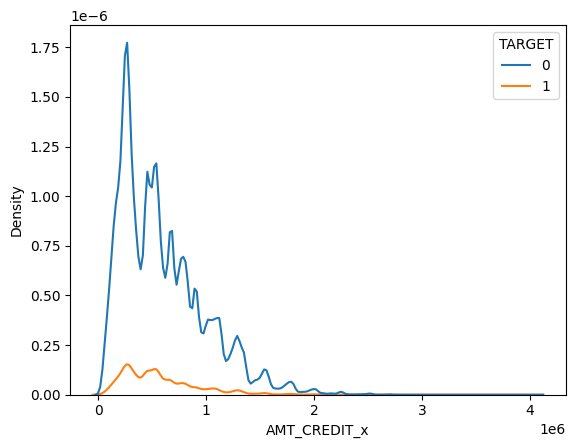

In [124]:
 sns.kdeplot(data=num_data,x='AMT_CREDIT_x',hue='TARGET')


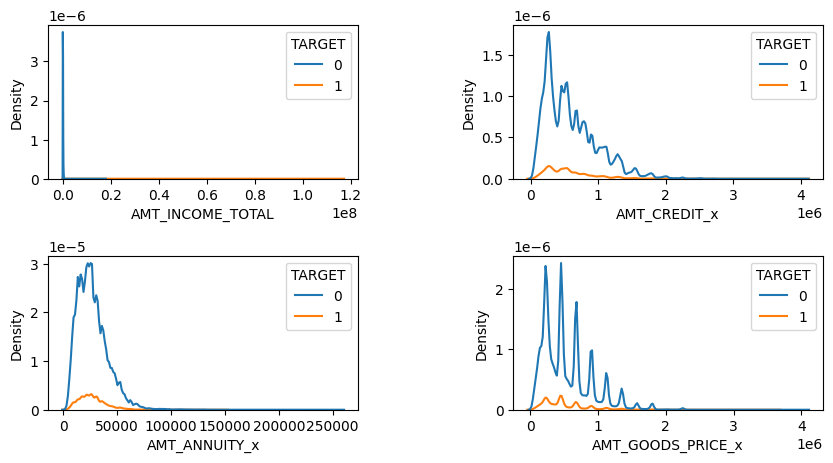

In [125]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var_x):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

#####     >> most of the loans were given for the goods price ranging between 0 to 1 ml
######     >> most of the loans were given for the credit amount of 0 to 1 ml
#####     >> most of the customers are paying annuity of 0 to 50 K
######     >> mostly the customers have income between 0 to 1 ml
#

<Axes: xlabel='AMT_CREDIT_y', ylabel='Density'>

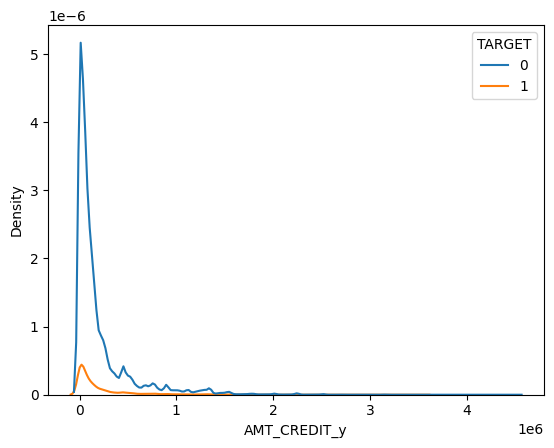

In [128]:
 sns.kdeplot(data=num_data,x='AMT_CREDIT_y',hue='TARGET')


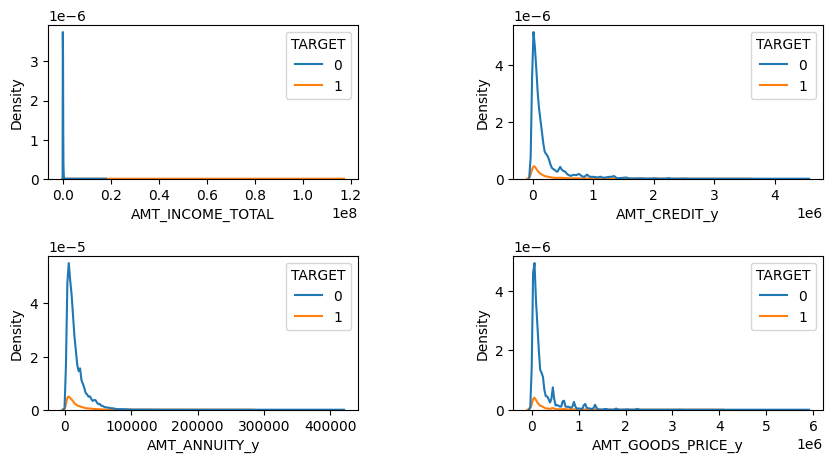

In [129]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var_y):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [130]:
date_var = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]

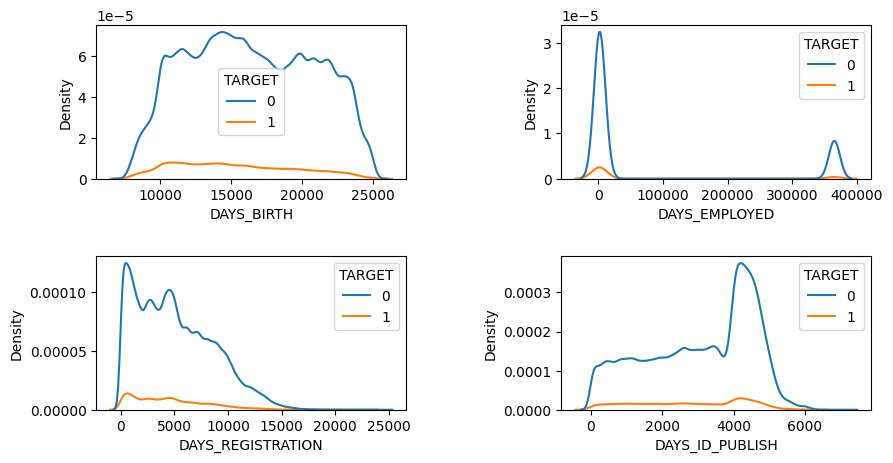

In [131]:
plt.figure(figsize=(10,5))

for i, col in enumerate(date_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

<Axes: xlabel='AMT_CREDIT_x', ylabel='AMT_GOODS_PRICE_x'>

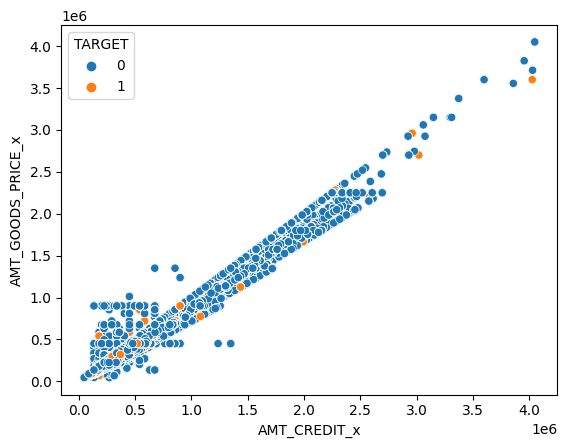

In [134]:
sns.scatterplot(data=num_data,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x',hue='TARGET')


###### >> AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing

#

<Axes: xlabel='AMT_CREDIT_x', ylabel='AMT_INCOME_TOTAL'>

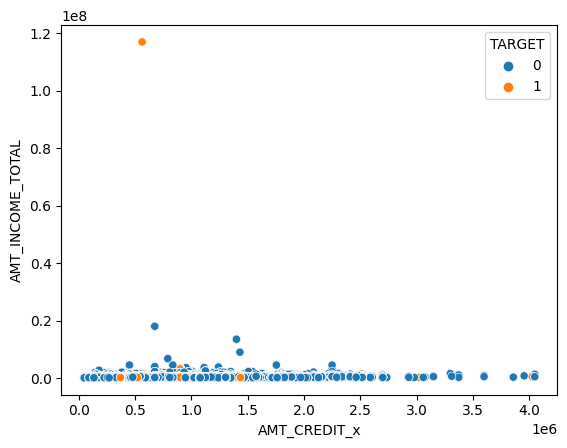

In [135]:
sns.scatterplot(data=num_data,x='AMT_CREDIT_x',y='AMT_INCOME_TOTAL',hue='TARGET')


######    >> people having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, 
###### coudl turn out to be defaulters. we can target income below 1 million and loan maount greater than 1.5 million
##

<Axes: xlabel='AMT_CREDIT_x', ylabel='CNT_CHILDREN'>

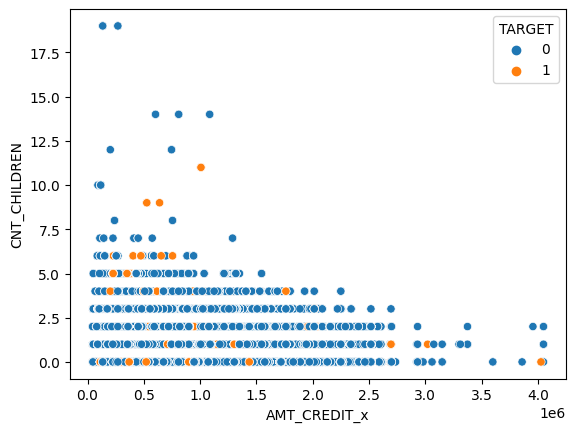

In [139]:
sns.scatterplot(data=num_data,x='AMT_CREDIT_x',y='CNT_CHILDREN',hue='TARGET')

#####     >> people having children 1 to less than 5 are safer to give the loan
#


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

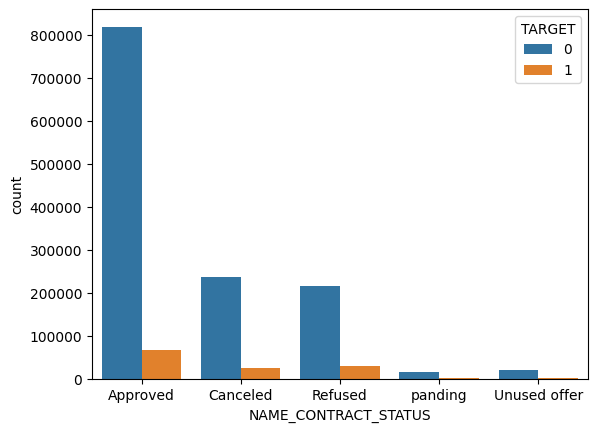

In [163]:
sns.countplot(data=new_merged_rev_df,x='NAME_CONTRACT_STATUS',hue='TARGET')


####    >> most of the app. which were prev. either canceled or refused 80-90% of them are repayer in the current data
#


In [ ]:
#sns.countplot(data=new_merged_rev_df,x='NAME_CONTRACT_STATUS',hue='TARGET')


In [147]:
new_merged_rev_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size()

NAME_CONTRACT_STATUS  TARGET
Approved              0         818856
                      1          67243
Canceled              0         235641
                      1          23800
Refused               0         215952
                      1          29438
Unused offer          0          20892
                      1           1879
panding               0          15474
                      1            980
dtype: int64

In [148]:
merged_agg = new_merged_rev_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2.head()

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

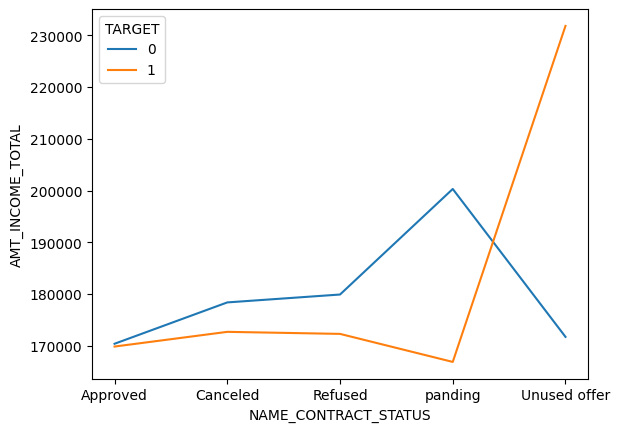

In [156]:
sns.lineplot(data=new_merged_rev_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


##### offers which were unused prev. now have maximum number of defaulters despite of having high income band customers
#

In [155]:
len(new_merged_rev_df.columns)

78

In [170]:
new_merged_rev_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_INCOME_TOTAL_RANGE,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,200K-250K,20Y-30Y
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,250K-300K,40Y-50Y
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,250K-300K,40Y-50Y
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,250K-300K,40Y-50Y
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,C

In [162]:

new_merged_rev_df.groupby(['ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE',"TARGET"]).size()

ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  TARGET
Advertising        0.0                       0         883
                                             1          97
                   1.0                       0         252
                                             1           6
                   2.0                       0         218
                                                      ... 
XNA                23.0                      0           6
                   24.0                      0          43
                   25.0                      0          20
                   26.0                      0           1
                   28.0                      0           2
Length: 1538, dtype: int64

In [ ]:
sns.lineplot(data=new_merged_rev_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

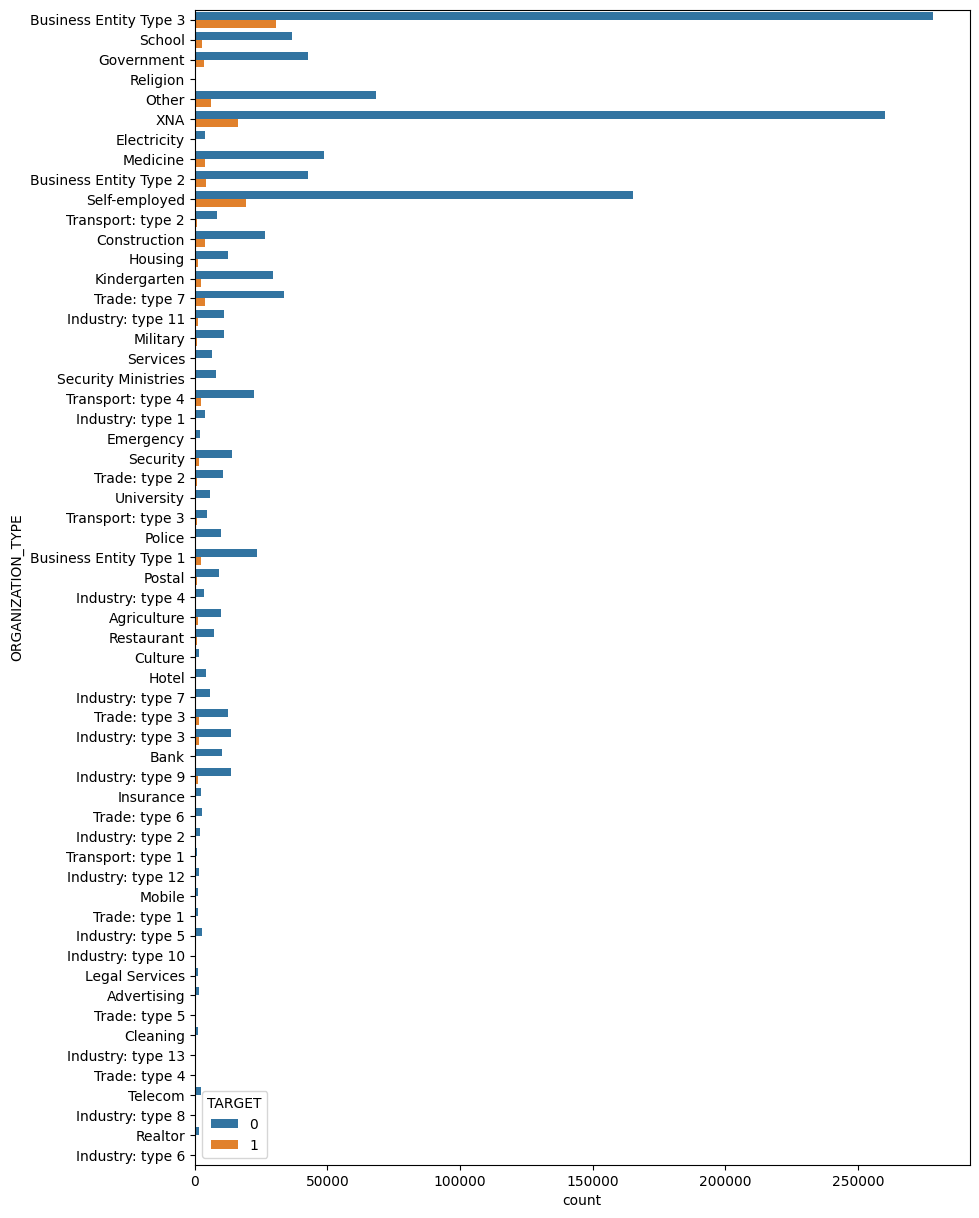

In [168]:
plt.figure(figsize=(10,15))

sns.countplot(data=new_merged_rev_df,y='ORGANIZATION_TYPE',hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

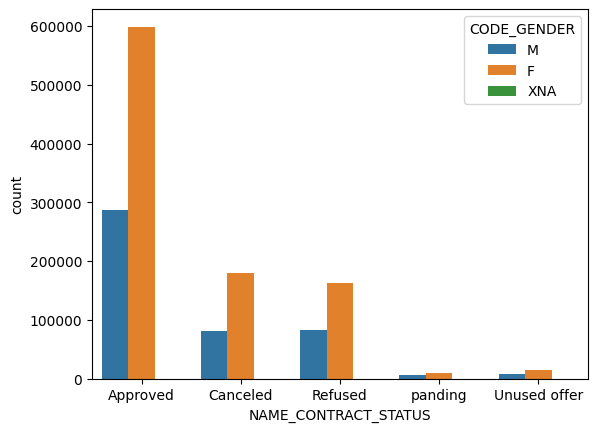

In [178]:
#plt.figure(figsize=(10,6))

sns.countplot(data=new_merged_rev_df,x='NAME_CONTRACT_STATUS',hue='CODE_GENDER')



<Axes: xlabel='CODE_GENDER', ylabel='count'>

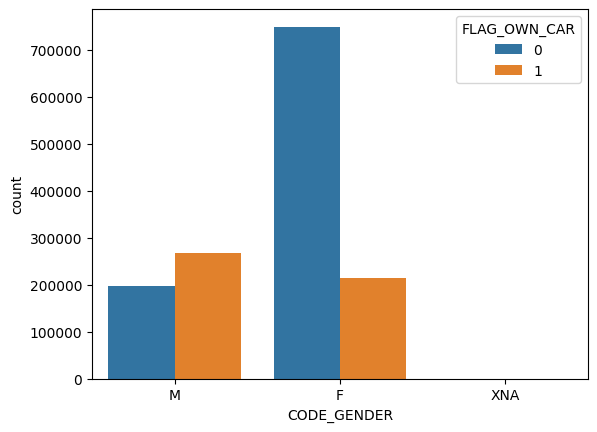

In [180]:

sns.countplot(data=new_merged_rev_df,x='CODE_GENDER',hue='FLAG_OWN_CAR')


In [172]:
new_merged_rev_df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

### Final Conclusion/Insights

#### Bank should target the customers :-

####  >> having low income i.e. below 1 ml
#####     >> working in Others, Business Entity Type 3, Self Employed  org. type
#####     >> working as Accountants, Core staff, Managers and Laborers 
######     >> having house/appartment and are married and having children not more than 5
######     >> Highly educated
######     >> preferably female
###### 
######     >> unacompanied people can be safer -  default rate is ~8.5%


### precautions :-
######     >> org. Transport type 3 should be avoided
######    >> Low-Skill Laboreres and drivers  should be avoided
######     >> offers prev. unused and high income customer should be avoided
#